<a href="https://colab.research.google.com/github/sungjindo/black_coal_price/blob/main/Prophet_maker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.모듈 불러오기**








In [1]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import os

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from plotly.offline import init_notebook_mode, iplot #plotly offline mode 
init_notebook_mode(connected = True)
import plotly.graph_objs as go #plotly graphical object
%matplotlib notebook
%matplotlib inline

# 통계 및 기계학습 관련 라이브러리
from scipy import stats    # 통계 관련 라이브러리
from sklearn.model_selection import train_test_split, RandomizedSearchCV    # 데이터 셋 분류 라이브러리
from sklearn.utils import resample    # 데이터 업샘플링&다운샘플링 라이브러리
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN    # 복합샘플링 라이브러리
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler    # 데이터 스케일링 라이브러리
from statsmodels.stats.outliers_influence import variance_inflation_factor    # 변수 간 다중공선성 확인(VIF) 라이브러리
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)    # 모델 정확도 검증 라이브러리
from sklearn.model_selection import cross_val_score, train_test_split   # validation  검증 라이브러리

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import statsmodels.api as sm    # 통계분석 관련 라이브러리
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error


import warnings    # 경고문구 지우기
warnings.filterwarnings("ignore")

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

from google.colab import drive
drive.mount('/content/gdrive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **2.data**


In [2]:
df = pd.read_csv("/content/gdrive/My Drive/Black_coal/data/dataset/df_final.csv", encoding = 'utf-8-sig')
df = df.sort_values('date')
df

,date,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,KPPI,ACPI,...,호주지수,캐나다지수,베트남GDP,인도GDP,한국GDP,일본GDP,중국GDP,미국GDP,EUGDP,세계GDP
469,2011-01-02,136.35,173.50,93.33,9436.0,88.03,88.48,56.16,6.8,220.223,...,4745.200195,13443.200195,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
468,2011-01-09,136.00,179.50,98.68,9662.0,91.54,91.66,55.31,6.8,220.223,...,4705.000000,13272.299805,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
467,2011-01-16,131.90,178.00,97.60,9462.5,89.11,89.13,55.12,6.8,220.223,...,4801.500000,13464.099609,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
466,2011-01-23,130.35,179.50,99.42,9548.5,89.34,89.49,53.73,6.8,220.223,...,4755.700195,13258.599609,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
465,2011-01-30,127.00,183.50,99.83,10067.0,89.03,89.13,54.84,6.8,220.223,...,4774.899902,13437.599609,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2019-12-01,66.40,88.56,64.39,5990.0,59.20,59.11,39.05,0.7,256.974,...,6846.000000,17040.199219,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
3,2019-12-08,66.30,92.27,65.22,6130.0,60.07,59.78,35.17,0.7,256.974,...,6707.000000,16997.000000,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
2,2019-12-15,66.35,91.74,66.14,6175.0,60.44,60.44,37.12,0.7,256.974,...,6739.700195,17003.099609,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
1,2019-12-22,66.55,91.55,68.16,6214.0,61.72,61.74,33.13,0.7,256.974,...,6816.299805,17118.400391,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13


# **3.Prophet model**

In [5]:
def prophetm(z, x, y) :
  
        a = prophetm(z, x, y) 
        df1 = df[['date', z]]
      
    
        df1.columns = ['ds', 'y']
        df1['ds']= pd.to_datetime(df1['ds'])
        
      
        train = df1.drop(df.index[x:])
        y_true = df1['y'][y:].values 
        
        last_1year = list()
        for i in range(1, 13):
            last_1year.append(['2019-%12d' % i])
        last_1year = pd.DataFrame(last_1year, columns = ['ds'])
        last_1year['ds']= pd.to_datetime(last_1year['ds'])
        m = Prophet(
        # trend
                changepoint_prior_scale=0.3,
        # seasonality
                weekly_seasonality=10,
                yearly_seasonality=20,
              daily_seasonality=False,)
        m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
        forecast = m.fit(train).predict(last_1year)
        fig = m.plot_components(forecast)
        a = add_changepoints_to_plot(fig.gca(), m, forecast)
        y_pred = forecast['yhat'].values
        return y_pred
      
# z = str(input('컬럼명 입력: '))
# x = int(input('삭제할 주 단위를 입력해주세요(-붙여서): '))
# y = int(input('필요한 y값의 월 단위를 입력해주세요(-붙여서): '))




print('-------------done------------')

-------------done------------


In [7]:
prophetm('Coal_price',-52,-12)

RecursionError: ignored

# 4.1 In-sample Forecast

*   트레인셋과 테스트 셋으로 확인하는 과정




In [ ]:
# train set 마지막 1년 날짜 생성
last_1year = list()
for i in range(1, 13):
    last_1year.append(['2019-%12d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds']= pd.to_datetime(last_1year['ds'])

# 에측
forecast = m.predict(last_1year)

In [ ]:
# 에측
forecast = m.predict(last_1year)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,46.742623,41.999747,57.678733,46.742623,46.742623,3.118036,3.118036,3.118036,3.118036,3.118036,3.118036,0.0,0.0,0.0,49.860659
1,2019-02-01,45.959106,39.110395,55.184853,45.959106,45.959106,0.885171,0.885171,0.885171,0.885171,0.885171,0.885171,0.0,0.0,0.0,46.844277
2,2019-03-01,45.251414,36.790027,51.722665,45.251414,45.251414,-0.702612,-0.702612,-0.702612,-0.702612,-0.702612,-0.702612,0.0,0.0,0.0,44.548802
3,2019-04-01,44.467897,34.278937,50.015775,44.467897,44.467897,-2.327605,-2.327605,-2.327605,-2.327605,-2.327605,-2.327605,0.0,0.0,0.0,42.140292
4,2019-05-01,43.709656,30.839066,46.975146,43.709656,43.709656,-4.697286,-4.697286,-4.697286,-4.697286,-4.697286,-4.697286,0.0,0.0,0.0,39.012369
5,2019-06-01,42.926139,29.440387,45.584677,42.926139,42.926139,-5.162542,-5.162542,-5.162542,-5.162542,-5.162542,-5.162542,0.0,0.0,0.0,37.763597
6,2019-07-01,42.167898,29.308323,45.008546,42.167898,42.167898,-4.926910,-4.926910,-4.926910,-4.926910,-4.926910,-4.926910,0.0,0.0,0.0,37.240987
7,2019-08-01,41.384381,29.236039,45.485010,41.384381,41.384381,-4.249391,-4.249391,-4.249391,-4.249391,-4.249391,-4.249391,0.0,0.0,0.0,37.134991
8,2019-09-01,40.600865,33.719888,49.674828,40.600865,40.600865,0.817435,0.817435,0.817435,0.817435,0.817435,0.817435,0.0,0.0,0.0,41.418299
9,2019-10-01,39.842623,36.929462,53.015041,39.842623,39.842623,5.177804,5.177804,5.177804,5.177804,5.177804,5.177804,0.0,0.0,0.0,45.020427


In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds       yhat  yhat_lower  yhat_upper
0 2019-01-01  49.860659   41.999747   57.678733
1 2019-02-01  46.844277   39.110395   55.184853
2 2019-03-01  44.548802   36.790027   51.722665
3 2019-04-01  42.140292   34.278937   50.015775
4 2019-05-01  39.012369   30.839066   46.975146


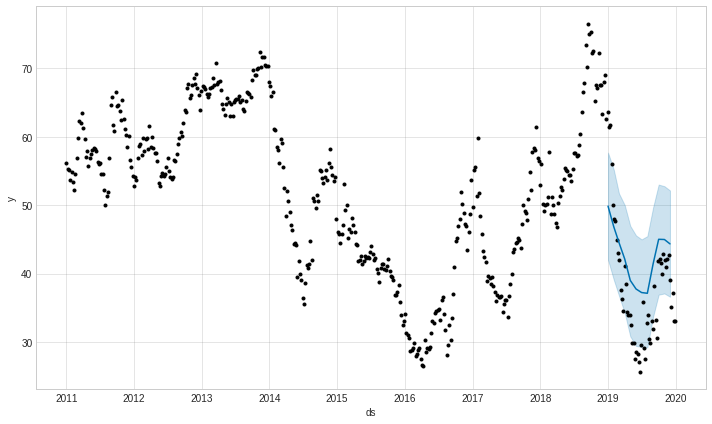

In [ ]:
m.plot(forecast)
pyplot.show()

# 4.2 Out-Of-Sample Forecast

*   데이터 외부의 미래 예측



In [ ]:
# train set 이후 1년 날짜 생성
last_1year = list()
for i in range(1, 13):
    last_1year.append(['2020-%12d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds']= pd.to_datetime(last_1year['ds'])

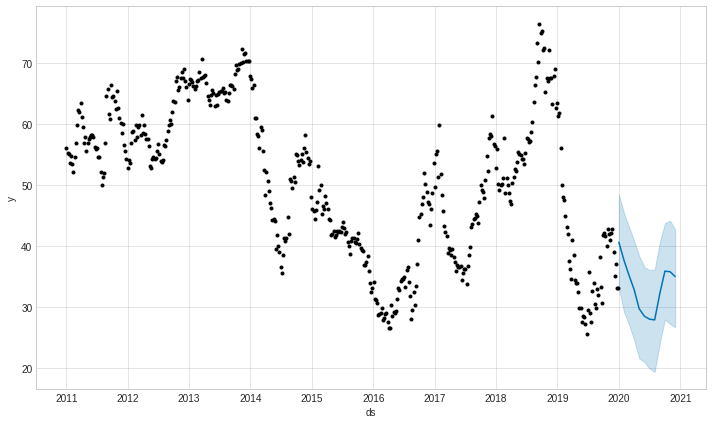

In [ ]:
forecast = m.predict(last_1year)
m.plot(forecast)
pyplot.show()

# 5.Model 평가



*   testset의 마지막 12개월을 테스트 셋으로 빼서 학습




In [ ]:
 # 마지막 3개월 제외시키기
train = df.drop(df.index[-12:])
y_true = df['y'][-12:].values

# 모델 생성 후 학습
m = Prophet()
m.fit(train)

# train set 마지막 1년 날짜 생성
last_1year = list()
for i in range(1, 13):
    last_1year.append(['2019-%12d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds']= pd.to_datetime(last_1year['ds'])

# 예측하고 비교하기
# 여기에서는 MAE를 살펴본다.
forecast = m.predict(last_1year)
y_pred = forecast['yhat'].values
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# MAE가 작을수록 좋은 모델이다.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE: 8.232


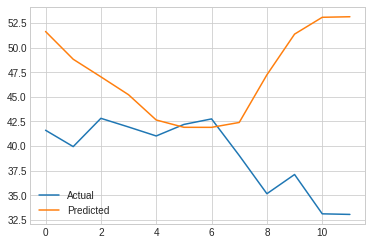

In [ ]:
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

# 6.Prameter조정

1.   Trend

*   **changepoints**	트렌드 변화시점을 명시한 리스트값
*  **changepoint_prior_scale**	changepoint(trend) 의 유연성 조절
*   **n_changepoints**	changepoint 의 개수
*   **changepoint_range**	changepoint 설정 가능 범위. (기본적으로 데이터 중 80% 범위 내에서 changepoint를 설정합니다.)


2.   **Seasonality**
*  **yearly_seasonality**	연 계절성
*  **weekly_seasonality**	주 계절성
*  **daily_seasonality**	일 계절성
*  **seasonality_prior_scale**	계절성 반영 강도
*  **seasonality_mode**	‘additive ‘ 인지 ‘multiplicative’ 인지


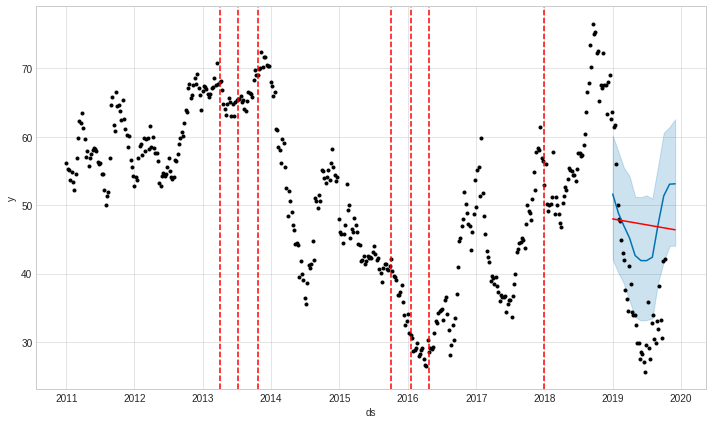

In [ ]:

# changepoint_prior_scale = 0.05 (default)
fig = m.plot(forecast)

a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


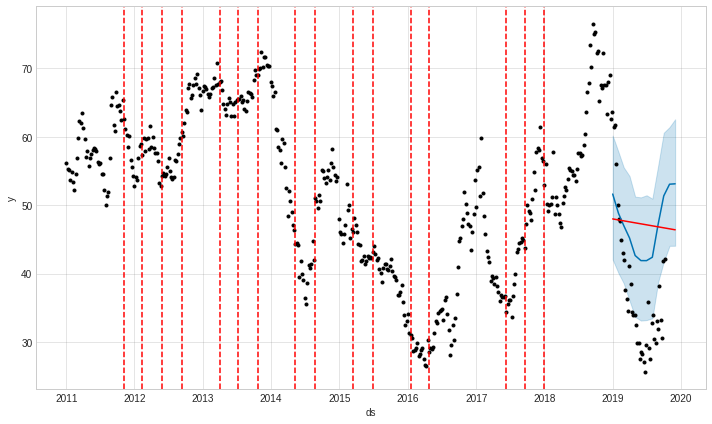

In [ ]:
m = Prophet(changepoint_prior_scale=0.3)
m.fit(train)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


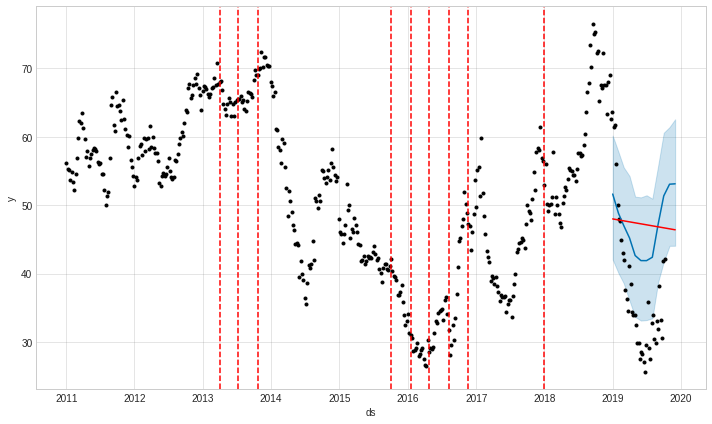

In [ ]:
m = Prophet(changepoint_prior_scale=0.1)
m.fit(train)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

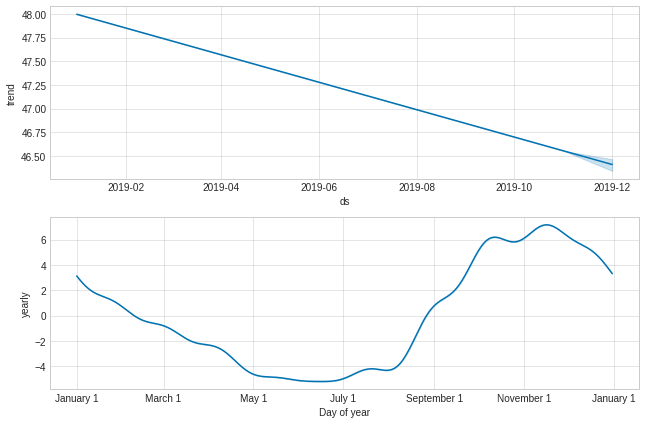

In [ ]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.3,
    # seasonality
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False)
m.fit(train)
fig = m.plot_components(forecast)

In [5]:
# yearly_seasonality = 10 (default)
m = Prophet(
    # trend
    changepoint_prior_scale=0.3,
    # seasonality
    weekly_seasonality=10,
    yearly_seasonality=20,
    daily_seasonality=False,)
m.fit(train)
fig = m.plot_components(forecast)

NameError: ignored

monthly는 제공되지 않아서 모델에 정의해서 반영


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


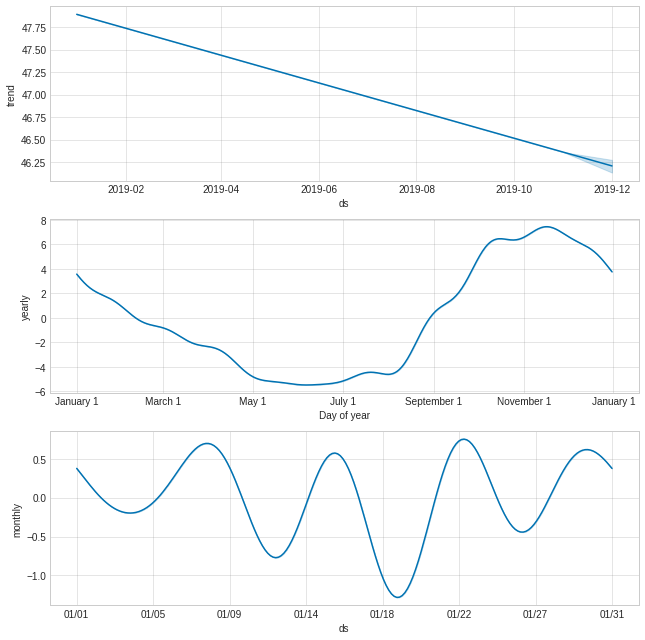

In [ ]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(train).predict(last_1year)
fig = m.plot_components(forecast)

# 주기가 30.5일 fourier oder가 5

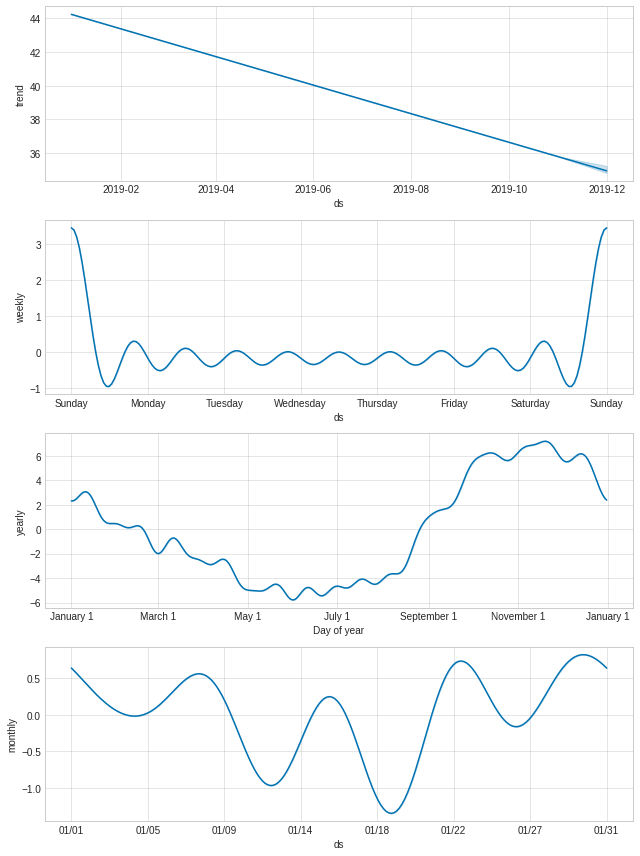

In [ ]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.3,
    # seasonality
    weekly_seasonality=10,
    yearly_seasonality=20,
    daily_seasonality=False,)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(train).predict(last_1year)
fig = m.plot_components(forecast)

# 주기가 30.5일 fourier oder가 5

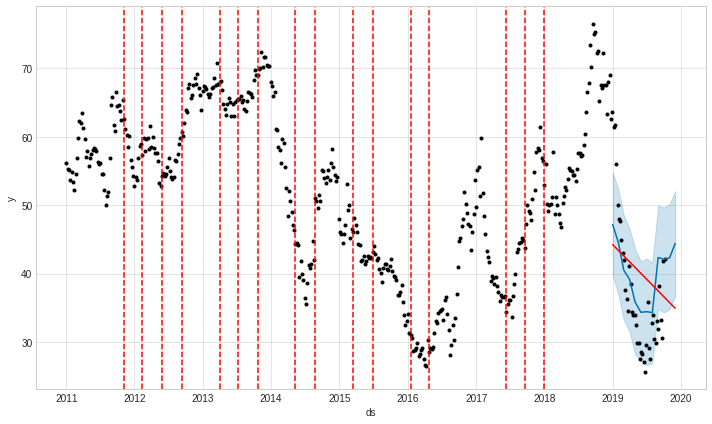

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
# train set 이후 1년 날짜 생성
last_1year = list()
for i in range(1, 13):
    last_1year.append(['2020-%12d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds']= pd.to_datetime(last_1year['ds'])

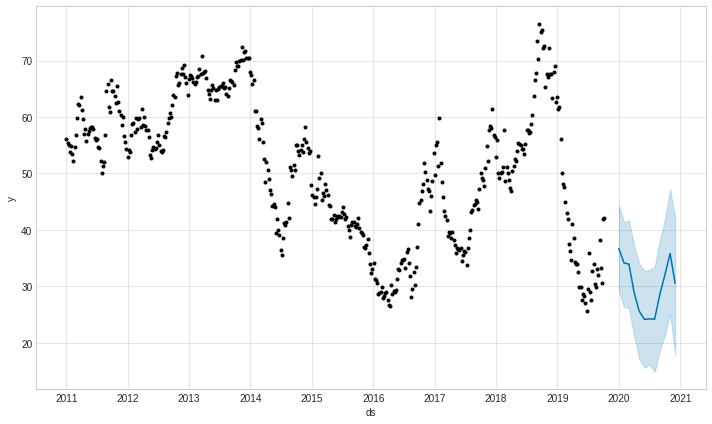

In [ ]:
forecast = m.predict(last_1year)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
m.plot(forecast)
pyplot.show()


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,34.080867,29.147166,44.331814,33.589887,34.629546,2.642604,2.642604,2.642604,0.464650,...,-0.172805,-0.172805,-0.172805,2.350759,2.350759,2.350759,0.0,0.0,0.0,36.723472
1,2020-02-01,33.217481,26.386692,41.364249,32.290801,34.265809,0.926147,0.926147,0.926147,0.638491,...,-0.172805,-0.172805,-0.172805,0.460461,0.460461,0.460461,0.0,0.0,0.0,34.143628
2,2020-03-01,32.409797,26.102971,41.676184,31.012750,33.927931,1.535927,1.535927,1.535927,0.068196,...,3.456096,3.456096,3.456096,-1.988365,-1.988365,-1.988365,0.0,0.0,0.0,33.945725
3,2020-04-01,31.546411,21.198134,37.209761,29.673580,33.708269,-2.609058,-2.609058,-2.609058,0.263149,...,-0.172805,-0.172805,-0.172805,-2.699402,-2.699402,-2.699402,0.0,0.0,0.0,28.937353
4,2020-05-01,30.710876,17.241425,34.040888,28.190561,33.497420,-5.085888,-5.085888,-5.085888,0.068196,...,-0.172805,-0.172805,-0.172805,-4.981278,-4.981278,-4.981278,0.0,0.0,0.0,25.624988
5,2020-06-01,29.847489,15.582053,32.712369,26.609056,33.471568,-5.681759,-5.681759,-5.681759,0.263149,...,-0.172805,-0.172805,-0.172805,-5.772103,-5.772103,-5.772103,0.0,0.0,0.0,24.165730
6,2020-07-01,29.011954,16.158553,32.937509,24.908604,33.378093,-4.756778,-4.756778,-4.756778,0.068196,...,-0.172805,-0.172805,-0.172805,-4.652168,-4.652168,-4.652168,0.0,0.0,0.0,24.255176
7,2020-08-01,28.148568,14.862506,33.519899,23.141327,33.286712,-3.947821,-3.947821,-3.947821,0.263149,...,-0.172805,-0.172805,-0.172805,-4.038165,-4.038165,-4.038165,0.0,0.0,0.0,24.200747
8,2020-09-01,27.285181,18.597282,38.253570,21.322086,33.351524,1.330851,1.330851,1.330851,0.464650,...,-0.172805,-0.172805,-0.172805,1.039005,1.039005,1.039005,0.0,0.0,0.0,28.616032
9,2020-10-01,26.449646,21.373732,41.876496,19.561897,33.487543,5.585720,5.585720,5.585720,0.263149,...,-0.172805,-0.172805,-0.172805,5.495376,5.495376,5.495376,0.0,0.0,0.0,32.035367


# 6.1 Prameter/train 기간조정

1.   Trend

*   **changepoints**	트렌드 변화시점을 명시한 리스트값
*  **changepoint_prior_scale**	changepoint(trend) 의 유연성 조절
*   **n_changepoints**	changepoint 의 개수
*   **changepoint_range**	changepoint 설정 가능 범위. (기본적으로 데이터 중 80% 범위 내에서 changepoint를 설정합니다.)


2.   **Seasonality**
*  **yearly_seasonality**	연 계절성
*  **weekly_seasonality**	주 계절성
*  **daily_seasonality**	일 계절성
*  **seasonality_prior_scale**	계절성 반영 강도
*  **seasonality_mode**	‘additive ‘ 인지 ‘multiplicative’ 인지


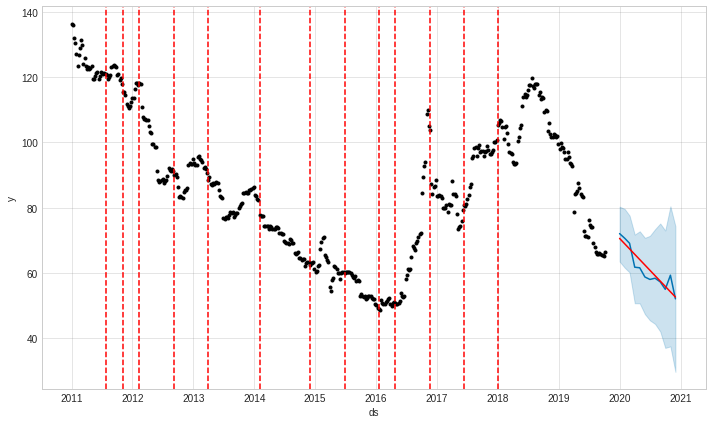

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
# changepoint_prior_scale = 0.05 (default)
fig = m.plot(forecast)

a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


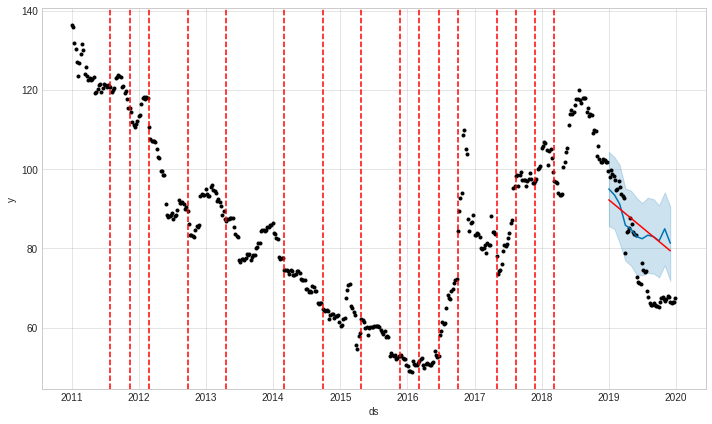

In [ ]:
m = Prophet(changepoint_prior_scale=0.3)
m.fit(df)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


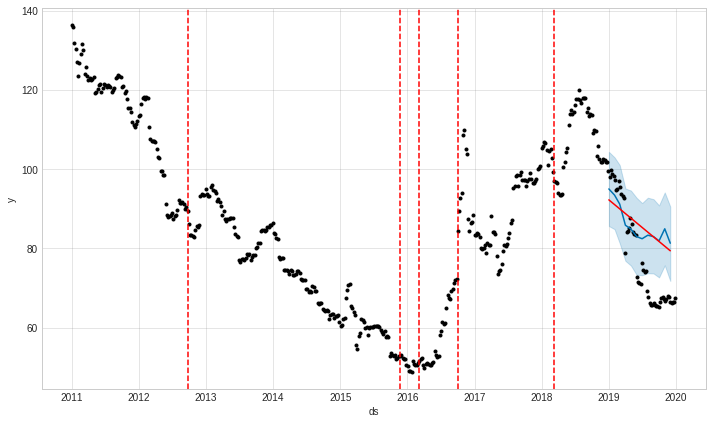

In [ ]:
m = Prophet(changepoint_prior_scale=0.1)
m.fit(df)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

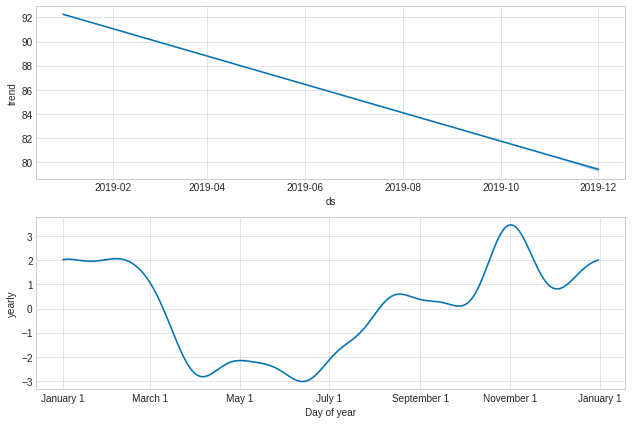

In [ ]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.3,
    # seasonality
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False)
m.fit(train)
fig = m.plot_components(forecast)

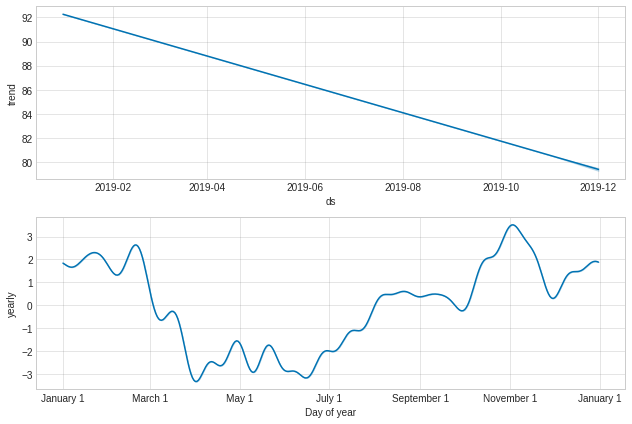

In [ ]:
# yearly_seasonality = 10 (default)
m = Prophet(
    # trend
    changepoint_prior_scale=0.3,
    # seasonality
    weekly_seasonality=10,
    yearly_seasonality=20,
    daily_seasonality=False,)
m.fit(train)
fig = m.plot_components(forecast)

monthly는 제공되지 않아서 모델에 정의해서 반영


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


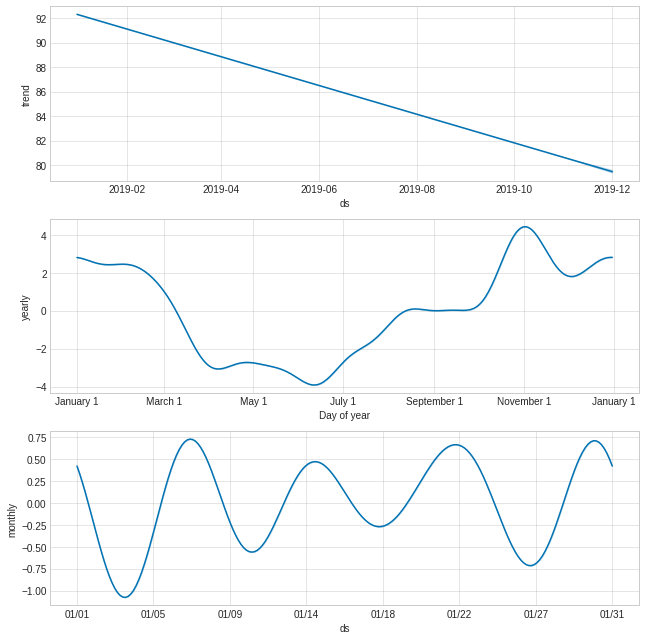

In [ ]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(train).predict(last_1year)
fig = m.plot_components(forecast)

# 주기가 30.5일 fourier oder가 5

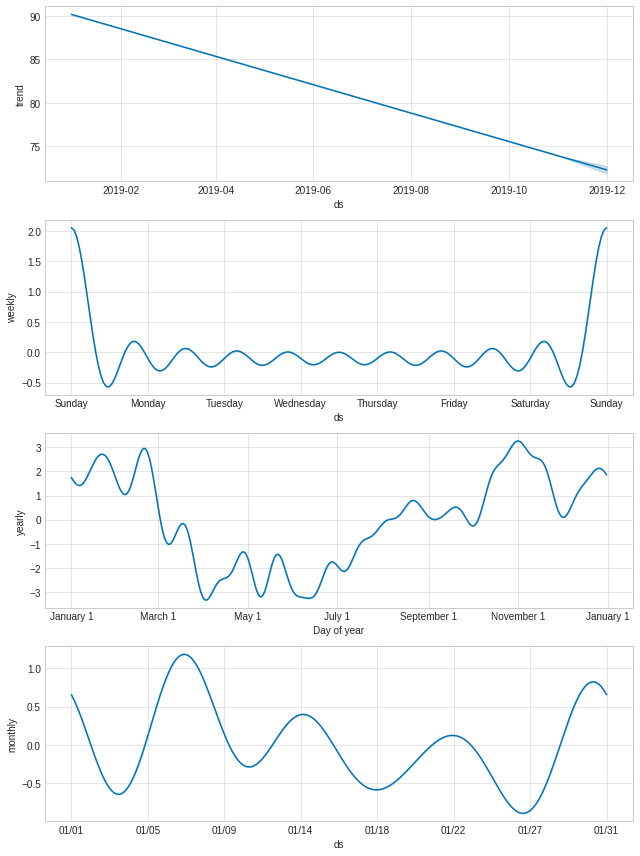

In [ ]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.3,
    # seasonality
    weekly_seasonality=10,
    yearly_seasonality=20,
    daily_seasonality=False,)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(train).predict(last_1year)
fig = m.plot_components(forecast)

# 주기가 30.5일 fourier oder가 5

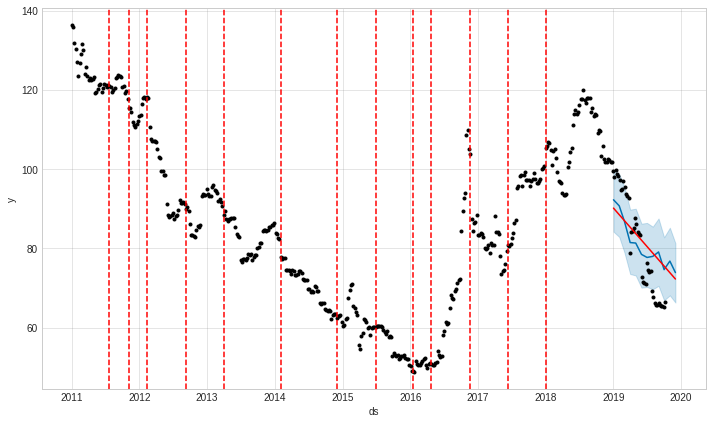

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
# train set 이후 1년 날짜 생성
last_1year = list()
for i in range(1, 13):
    last_1year.append(['2020-%12d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds']= pd.to_datetime(last_1year['ds'])

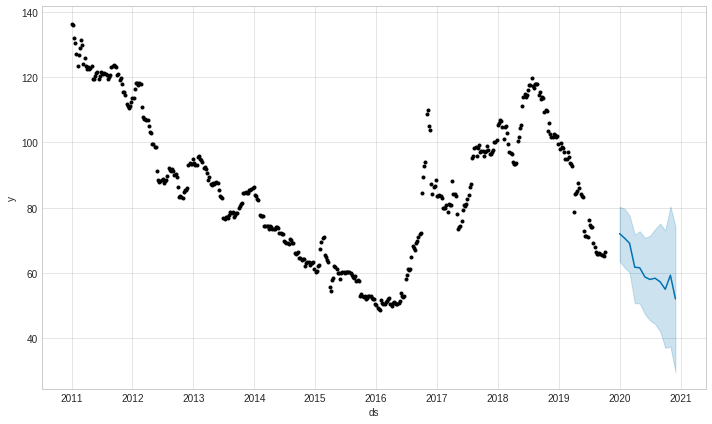

In [ ]:
forecast = m.predict(last_1year)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
m.plot(forecast)
pyplot.show()
